# Методы метрической классификации


#### Загрузите данные о диагностике сахарного диабета;

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import random
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error, confusion_matrix

In [2]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 
             'insulin', 'bmi', 'pedigree', 'age', 'label']
pima = pd.read_csv('diabetes.csv', header=None, names=col_names)
pima = pima[1:]


In [3]:
 pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1


In [4]:
Y = pima.label
X = pima.drop(['label'], axis=1)
Y = Y.astype({"label":int})

In [5]:
Y.head()

1    1
2    0
3    1
4    0
5    1
Name: label, dtype: int64

In [6]:
Y.describe()

count    768.000000
mean       0.348958
std        0.476951
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: label, dtype: float64

#### Разделите эти данные на тестовую и обучающую выборки;

In [7]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=True)


In [8]:
x_train.shape,y_train.shape

((614, 8), (614,))

In [9]:
x_test.shape, y_test.shape

((154, 8), (154,))

### 3.Постройте модель логистической регрессии для предсказания заболевания;

In [10]:
lr = LogisticRegression(max_iter=800)
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)


In [11]:
metrics.confusion_matrix(y_test, y_pred)

array([[89, 10],
       [24, 31]])

Text(0.5, 15.0, 'Предсказанные значения')

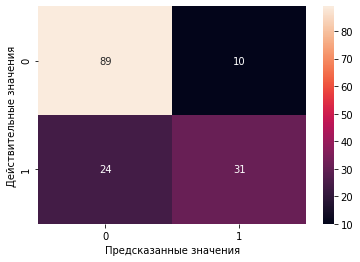

In [12]:
class_names = [0, 1]
fig, ax = plt.subplots()
ticks = np.arange(len(class_names))
plt.xticks(ticks, class_names)
plt.yticks(ticks, class_names)
 
sns.heatmap(pd.DataFrame(
    metrics.confusion_matrix(y_test, y_pred)),
    annot=True)
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')


### 4.Оцените качество модели на тестовой выборке с помощью следующих метрик

#### Достоверность предсказания (accuracy)

In [13]:
metrics.accuracy_score(y_test, y_pred)

0.7792207792207793

Как показывает данная метрика, точность классификатора для пожмножеств составляет 78%

#### Точность (precision)

In [14]:
metrics.precision_score(y_test, y_pred)

0.7560975609756098

Так как precision высчитывается как true_predicted/(true_predicted+false_predicted), то этот показатель показывает общую точность предсказания для всех подмножеств. В данном случае он составляет 75%

#### Полнота (recall)

Полнота системы  показывает долю найденных объектов класса к общему числу объектов класса.

In [15]:
metrics.recall_score(y_test, y_pred)

0.5636363636363636

Так как полнота составляет где-то 56%, то получается, что оставшиеся 44% были не найдены

### 5.Сделайте вывод о применимости модели.

Так как для данной модели у нас главная цель находить по симптомам людей с заболеванием, а метрика recall показала, что только 56% больных людей было обнаружено, поэтому думаю, что данная модель не подходит

## Дополнительные задания

### 1.Используйте метод опорных векторов для построения альтернативной модели предсказания диабета.

Тут я использую вектор с линейный ядром

In [16]:
from sklearn import svm

In [17]:
model1 = svm.SVC(kernel='linear', C=1.0)
model1.fit(x_train, y_train)
y_predict = model1.predict(x_test)
recallscore = metrics.recall_score(y_test, y_predict, average=None)
print(recallscore[0])

0.898989898989899


#### 2.Сравните метрики эффективности и сделайте вывод о том, какая модель лучше предсказывает заболевание.


Как мы можем наблюдать процент полноты для данного dataseta значительно повысиля, а значит, что с помощью метода опорных векторов было найдено больше процентов больных

#### 3.Постройте модели классификации на основе следующих методов:


In [18]:
recall_=[0,0,0,0,0]

### логистическая регрессия (LogisticRegression);


In [19]:
lr = LogisticRegression(max_iter=800)
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)


In [20]:
metrics.confusion_matrix(y_test, y_pred)

array([[89, 10],
       [24, 31]])

Text(0.5, 15.0, 'Предсказанные значения')

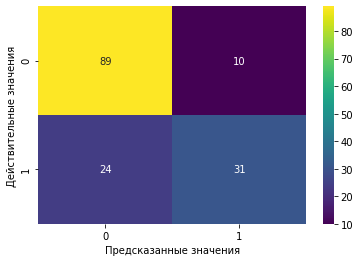

In [21]:
class_names = [0, 1]
fig, ax = plt.subplots()
ticks = np.arange(len(class_names))
plt.xticks(ticks, class_names)
plt.yticks(ticks, class_names)
 
sns.heatmap(pd.DataFrame(
    metrics.confusion_matrix(y_test, y_pred)),cmap="viridis",
    annot=True)
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')


#### Полнота (recall)

Полнота системы  показывает долю найденных объектов класса к общему числу объектов класса.

In [22]:
recallscore = metrics.recall_score(y_test, y_pred, average=None)
print(recallscore)
recall_[0]=recallscore


[0.8989899  0.56363636]


#### Построение ROC-кривой

In [23]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='red', label='ROC , auc='+str(round(auc,2)))
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive ')
    plt.ylabel('True Positive ')
    plt.title('Площадь ROC-кривой')
    plt.legend()
    plt.show()

AUC: 0.84


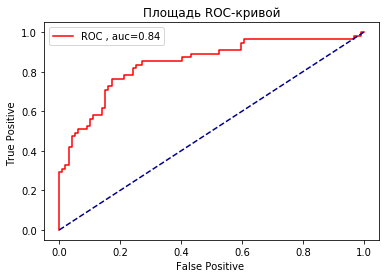

In [24]:
probs = lr.predict_proba(x_test)
probs = probs[:, 1]

auc = roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc)

fpr, tpr, thresholds = roc_curve(y_test, probs)
plot_roc_curve(fpr, tpr)

 ROC-кривая показывает зависимость количества верно классифицированных положительных примеров от количества неверно классифицированных отрицательных примеров. Чем ближе кривая расположена к верхнему левому углу, тем лучше модель предсказывает и различает классы

С помощью численного показателя площади под кривой (AUC)  можно судить о качестве построенной модели, соглано шкале экспертов auc = 0,84 попадает в интервал "Очень хорошая". При этом auc не может как-то показать чувствительность и специфичность модели

### метод опорных векторов с линейным ядром (SVC);

In [25]:
model1 = svm.SVC(kernel='linear', C=1.0, probability=True)
model1.fit(x_train, y_train)
y_predict = model1.predict(x_test)
recallscore = metrics.recall_score(y_test, y_predict, average=None)
recall_[1]=recallscore
print('Полнота:',recallscore)

Полнота: [0.8989899  0.56363636]


Text(0.5, 15.0, 'Предсказанные значения')

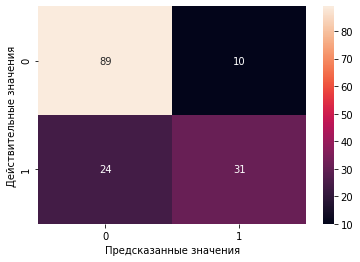

In [26]:
class_names = [0, 1]
fig, ax = plt.subplots()
ticks = np.arange(len(class_names))
plt.xticks(ticks, class_names)
plt.yticks(ticks, class_names)
 
sns.heatmap(pd.DataFrame(
    metrics.confusion_matrix(y_test, y_predict)),
    annot=True)
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')

#### Построение ROC-кривой

In [27]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='red', label='ROC , auc='+str(round(auc,2)))
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive ')
    plt.ylabel('True Positive ')
    plt.title('Площадь ROC-кривой')
    plt.legend()
    plt.show()

AUC: 0.83


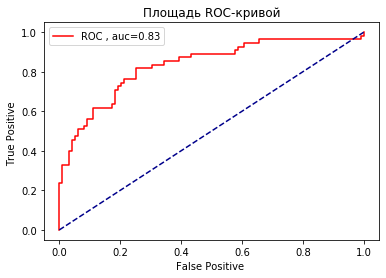

In [28]:
probs = model1.predict_proba(x_test)
probs = probs[:, 1]

auc = roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc)

fpr, tpr, thresholds = roc_curve(y_test, probs)
plot_roc_curve(fpr, tpr)

### метод опорных векторов с гауссовым ядром (SVC);

In [29]:
model1 = svm.SVC(kernel='rbf', C=1.0,gamma='scale',probability=True)
model1.fit(x_train, y_train)
y_predict = model1.predict(x_test)
recallscore = metrics.recall_score(y_test, y_predict, average=None)
recall_[2]=recallscore
print('Полнота:',recallscore)

Полнота: [0.93939394 0.50909091]


Text(0.5, 15.0, 'Предсказанные значения')

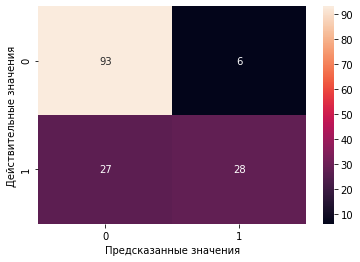

In [30]:
class_names = [0, 1]
fig, ax = plt.subplots()
ticks = np.arange(len(class_names))
plt.xticks(ticks, class_names)
plt.yticks(ticks, class_names)
 
sns.heatmap(pd.DataFrame(
    metrics.confusion_matrix(y_test, y_predict)),
    annot=True)
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')

#### Построение ROC-кривой

In [31]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='red', label='ROC , auc='+str(round(auc,2)))
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive ')
    plt.ylabel('True Positive ')
    plt.title('Площадь ROC-кривой')
    plt.legend()
    plt.show()

AUC: 0.83


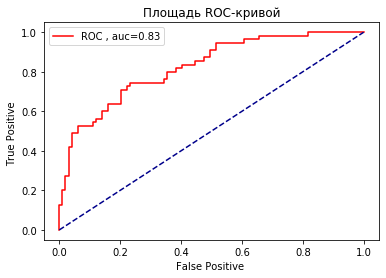

In [32]:
probs = model1.predict_proba(x_test)
probs = probs[:, 1]

auc = roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc)

fpr, tpr, thresholds = roc_curve(y_test, probs)
plot_roc_curve(fpr, tpr)

### метод k ближайших соседей (KNeighborsClassifier);

In [33]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(algorithm='auto', leaf_size=30,
           metric_params=None, n_neighbors=5, p=2, weights='uniform')
knn.fit(x_train, y_train)
y_test_predict = knn.predict(x_test)
recallscore = metrics.recall_score(y_test, y_test_predict, average='binary')
print('Полнота:',recallscore)

Полнота: 0.5636363636363636


Кросс-валидация для подбора оптимального k

In [34]:
from sklearn.model_selection import GridSearchCV
n_neighbors_array = [1, 3, 5, 7, 10, 15]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid={'n_neighbors': n_neighbors_array})
grid.fit(x_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print (best_cv_err, best_n_neighbors)


0.28660535785685726 15


In [35]:
knn = KNeighborsClassifier(algorithm='auto', leaf_size=30,
           metric_params=None, n_neighbors=15, p=2, weights='uniform')
knn.fit(x_train, y_train)
y_test_predict = knn.predict(x_test)
recallscore = metrics.recall_score(y_test, y_test_predict, average=None)
recall_[3]=recallscore
print('Полнота:',recallscore)

Полнота: [0.8989899  0.58181818]


Text(0.5, 15.0, 'Предсказанные значения')

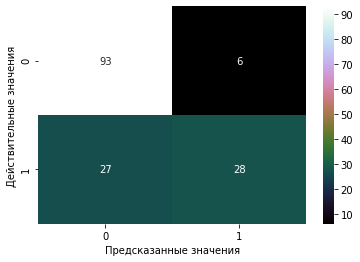

In [36]:
class_names = [0, 1]
fig, ax = plt.subplots()
ticks = np.arange(len(class_names))
plt.xticks(ticks, class_names)
plt.yticks(ticks, class_names)
 
sns.heatmap(pd.DataFrame(
    metrics.confusion_matrix(y_test, y_predict)),cmap="cubehelix",
    annot=True)
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')

Как мы видим, при новом k улучшился показатель полноты

In [37]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='red', label='ROC , auc='+str(round(auc,2)))
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive ')
    plt.ylabel('True Positive ')
    plt.title('Площадь ROC-кривой')
    plt.legend()
    plt.show()

AUC: 0.79


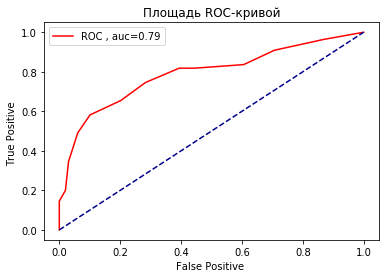

In [38]:
probs = knn.predict_proba(x_test)
probs = probs[:, 1]

auc = roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc)

fpr, tpr, thresholds = roc_curve(y_test, probs)
plot_roc_curve(fpr, tpr)

Согласно экспертной шкале для оценки AUC модель с данным методом попадает под оценку качества модели "Хорошее"

### многослойный перцептрон (MLP);

In [39]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(random_state=1, max_iter=300).fit(x_train, y_train)
y_predict = clf.predict(x_test)

recallscore = metrics.recall_score(y_test, y_predict, average=None)
recall_[4]=recallscore
print('Полнота:',recallscore)
#y_predict

Полнота: [0.36363636 0.83636364]


Text(0.5, 15.0, 'Предсказанные значения')

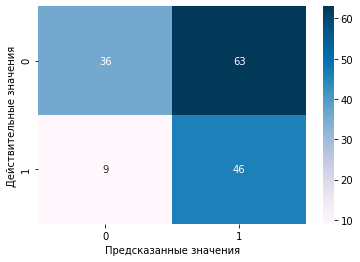

In [40]:
class_names = [0, 1]
fig, ax = plt.subplots()
ticks = np.arange(len(class_names))
plt.xticks(ticks, class_names)
plt.yticks(ticks, class_names)
 
sns.heatmap(pd.DataFrame(
    metrics.confusion_matrix(y_test, y_predict)),cmap="PuBu",
    annot=True)
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')

In [41]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='red', label='ROC , auc='+str(round(auc,2)))
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive ')
    plt.ylabel('True Positive ')
    plt.title('Площадь ROC-кривой')
    plt.legend()
    plt.show()

AUC: 0.69


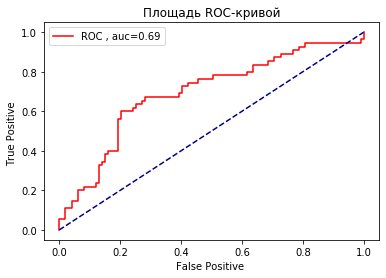

In [42]:
probs = clf.predict_proba(x_test)
probs = probs[:, 1]

auc = roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc)

fpr, tpr, thresholds = roc_curve(y_test, probs)
plot_roc_curve(fpr, tpr)

Согласно экспертной шкале для оценки AUC модель с данным методом попадает под оценку качества модели "Среднее"

### Проанализируйте метрики каждой модели и сделайте выводы об их эффективности и применимости. Сравните эффективность всех этих моделей и выберите лучшую;

In [43]:
print('LogisticRegression recall:',recall_[0])
print('SVC linear:               ',recall_[1])
print('SVC с Гауссовым ядром:    ',recall_[2])
print('KNeighborsClassifier:     ',recall_[3])
print('MLP:                      ',recall_[4])

LogisticRegression recall: [0.8989899  0.56363636]
SVC linear:                [0.8989899  0.56363636]
SVC с Гауссовым ядром:     [0.93939394 0.50909091]
KNeighborsClassifier:      [0.8989899  0.58181818]
MLP:                       [0.36363636 0.83636364]


Для оценивания эффективности использовалась метрика recall_score с параметром average=None, что возвращало полноту для каждого класса

Сравнивая показатели  recall_score (полноты) модели и тепловую матрицу, где количество верхных предсказаний класса 1 и 0 находятся на главной диагонали, можно понять, что MLP хуже всех справилась с задачей

Если оценивать ROC-кривую для каждого метода,то по полученной площади под кривой хуже справилась модель с метдом MLP, она хуже видит различие между классами:  ее линия ROC ближе к диагонали, а метрика AUC незначительно, но меньше


Остальные методы оказали +- одинаковый результат, не превысив 60% полноты модели, если оценивать в целом полноту для всей модели, но при этом самый лучший результат полноты для true positive (Это случаи, в которых мы предсказывали «да» и на самом деле «да») показал метод SVC  c Гауссовым ядром: это является лучшим методом для данного датасета, так как мы преследуем цель определять больных сахарным диабетом

Достаточно интересный метод к-ближайших соседей, так как он учитывает значение к, поэтому для лучшего результата k тоже стоит подбирать (можно делать с помощью cross-validation)

### Повторите полностью анализ для другой задачи - распознавание вида ириса по параметрам растения (можно использовать метод sklearn.datasets.load_iris()).


Я скачала данные iris.csv


In [44]:
data = pd.read_csv('iris.csv')

In [45]:
data.drop('Id', axis=1, inplace=True)  
print(data.head(5)) 

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa


In [46]:
X = data.drop(['Species'],axis = 1)
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [47]:
Y = data['Species']
Y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [48]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=27)

### логистическая регрессия (LogisticRegression);


In [49]:
lr = LogisticRegression(max_iter=800)
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)


In [50]:
print(confusion_matrix(y_pred, y_test))

[[ 7  0  0]
 [ 0 10  1]
 [ 0  1 11]]


Text(0.5, 15.0, 'Предсказанные значения')

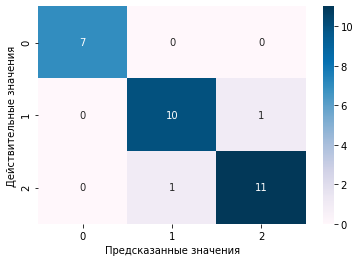

In [51]:
class_names = [0, 1]
fig, ax = plt.subplots()
ticks = np.arange(len(class_names))
plt.xticks(ticks, class_names)
plt.yticks(ticks, class_names)
 
sns.heatmap(pd.DataFrame(
    metrics.confusion_matrix(y_test, y_pred)),cmap="PuBu",
    annot=True)
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')


In [52]:
recallscore = metrics.recall_score(y_test, y_pred, average=None)
print('Полнота :',' , '.join(map(lambda x: str(x),recallscore)))
print('Достоверность предсказания (accuracy) :',metrics.accuracy_score(y_pred, y_test))


Полнота : 1.0 , 0.9090909090909091 , 0.9166666666666666
Достоверность предсказания (accuracy) : 0.9333333333333333


Достаточно высокая полнота предсказывания для каждого класса, у 1 класса вообще нет ошибок

### метод опорных векторов с гауссовым ядром (SVC);

In [53]:
SVC_model = svm.SVC()  
SVC_model.fit(x_train, y_train) 
svc_predict = SVC_model.predict(x_test) 
print(metrics.classification_report(svc_predict, y_test))


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.91      0.91      0.91        11
 Iris-virginica       0.92      0.92      0.92        12

       accuracy                           0.93        30
      macro avg       0.94      0.94      0.94        30
   weighted avg       0.93      0.93      0.93        30



In [54]:
print(confusion_matrix(svc_predict, y_test))

[[ 7  0  0]
 [ 0 10  1]
 [ 0  1 11]]


Text(0.5, 15.0, 'Предсказанные значения')

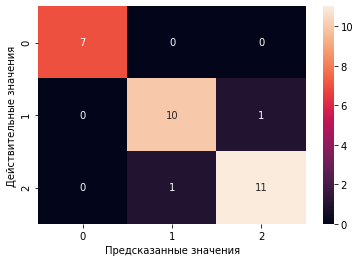

In [55]:
class_names = [0, 1]
fig, ax = plt.subplots()
ticks = np.arange(len(class_names))
plt.xticks(ticks, class_names)
plt.yticks(ticks, class_names)
 
sns.heatmap(pd.DataFrame(
    metrics.confusion_matrix(y_test, svc_predict)),
    annot=True)
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')



In [56]:
recallscore = metrics.recall_score(y_test, svc_predict, average=None)
print('Полнота :',' , '.join(map(lambda x: str(x),recallscore)))
print('Достоверность предсказания (accuracy) :',metrics.accuracy_score(svc_predict, y_test))


Полнота : 1.0 , 0.9090909090909091 , 0.9166666666666666
Достоверность предсказания (accuracy) : 0.9333333333333333


### метод k ближайших соседей (KNeighborsClassifier);

In [57]:
KNN_model = KNeighborsClassifier(n_neighbors=5)  
KNN_model.fit(x_train, y_train)
KNN_prediction = KNN_model.predict(x_test)

print(metrics.classification_report(KNN_prediction, y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       1.00      0.92      0.96        12
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



In [58]:
recallscore = metrics.recall_score(y_test, KNN_prediction, average=None)
print('Полнота :',' , '.join(map(lambda x: str(x),recallscore)))
print('Достоверность предсказания (accuracy) :',metrics.accuracy_score(KNN_prediction, y_test))

Полнота : 1.0 , 1.0 , 0.9166666666666666
Достоверность предсказания (accuracy) : 0.9666666666666667


Text(0.5, 15.0, 'Предсказанные значения')

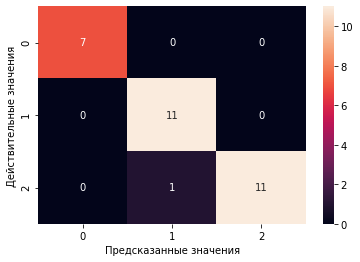

In [59]:
class_names = [0, 1]
fig, ax = plt.subplots()
ticks = np.arange(len(class_names))
plt.xticks(ticks, class_names)
plt.yticks(ticks, class_names)
 
sns.heatmap(pd.DataFrame(
    metrics.confusion_matrix(y_test, KNN_prediction)),
    annot=True)
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')

### многослойный перцептрон (MLP);

In [60]:
clf = MLPClassifier(random_state=1, max_iter=800).fit(x_train, y_train)
y_predict = clf.predict(x_test)

recallscore = metrics.recall_score(y_test, y_predict, average=None)
recall_[4]=recallscore
print('Полнота:',recallscore) 
print('Достоверность предсказания (accuracy) :',metrics.accuracy_score(y_predict, y_test))

Полнота: [1.         1.         0.91666667]
Достоверность предсказания (accuracy) : 0.9666666666666667


Text(0.5, 15.0, 'Предсказанные значения')

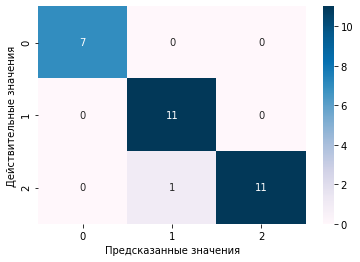

In [61]:
class_names = [0, 1]
fig, ax = plt.subplots()
ticks = np.arange(len(class_names))
plt.xticks(ticks, class_names)
plt.yticks(ticks, class_names)


 
sns.heatmap(pd.DataFrame(
    metrics.confusion_matrix(y_test, y_predict)),cmap="PuBu",
    annot=True)
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')

У всех методов для данного датасета достаточно высокая accuracy, тем не менее наиболее точная достигается при методах MLP и k-блиайших соседей: если смотреть по показателю полноты для каждого класса, то в этих 2 методах для 2 из 3 классов полнота предсказания достигает своего максимума - 100%